# Визуализация данных с помощью plotnine

## Введение

В рамках курса вы познакомитесь с принципами визуализации данных при помощи библиотеки plotnine. Эта библиотека реализует концепцию **"грамматики графики"** (**grammar of graphics**) - специального языка, позволяющего описать любую визуализацию данных.  
Библиотека **plotnine** основана на пакете **ggplot2**.  
В этом блокноте мы покажем базовые элементы грамматики - геометрические объекты и эстетики, статистические преобразования, шкалы и координатные системы.  

Более подробно с этой библиотекой можно ознакомиться в следующих источниках:  
- [Plotnine: Grammar of Graphics for Python](https://datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python/)  
- [Plotnine Documentation](https://plotnine.readthedocs.io/en/stable/gallery.html)

**Установка библиотеки plotnine и набора данных nycflights**

In [93]:
#!pip install plotnine
#!pip install nycflights13

**Загрузка библиотек**

In [94]:
import pandas as pd
import numpy as np
from plotnine import *

## Связывание (mapping) и определение (setting)

Познакомимся с набором данных о топливной эффективности автомобилей.

In [95]:
from plotnine.data import mpg

In [96]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Этот набор данных содержит сведения о топливной эффективности различных моделей автомобилей, собранных агентством EPA. Посмотреть описание столбцов набора данных можно выполнив команду: `?mpg`.  
В этом блоконоте мы будем использовать некоторые из переменных данного набора - пробег на 1 галлоне топлива по трассе (`hwy`), объем двигателя в литрах (`displ`), тип привода (`drv`), число цилиндров двигателя (`cyl`).

### Минимальный шаблон графика. Связывание (mapping) эстетик

Грамматика графики, реализованная в plotnine, позволяет **связать (map)** столбцы набора данных с характеристиками геометрических объектов, которые используются для визуализации данных.

Геометрические объекты (**geom**) - это точки, столбцы, линии, полигоны и др. Характеристиками этих объектов являются положение (x и y), цвет, размер, заливка, символ, прозрачность и т.п. В plotnine визуальные характеристики называются **эстетиками (aesthetics)**.

Таким образом, чтобы построить график, необходимо как минимум:

* указать, с каким набором данных мы хотим работать,
* выбрать тип визуализации (геом),
* связать эстетики выбранного геома и столбцы в таблице данных.

<img src="pics/Picture2.png" width=5000 height=600 />

Вот минимальный шаблон графика:

```
ggplot(data = <DATA>) +
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

Применим шаблон к сгенерированным данным.

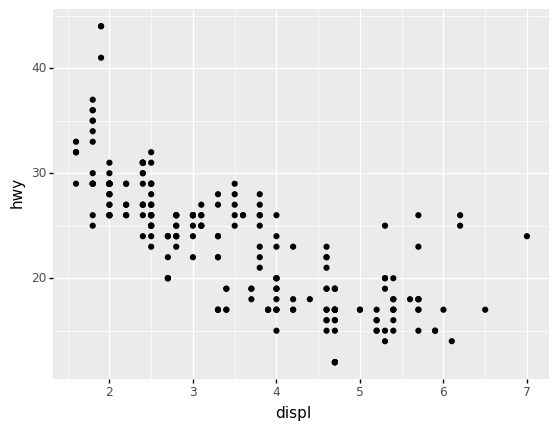

<ggplot: (89998469584)>

In [97]:
(ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy')))

**Замечания:**

1. Набор данных для графика можно указать в аргументах функции ggplot().

2. Геометрические объекты добавляются на график как отдельные слои, с помощью оператора +. Здесь мы добавили только один слой. Обратите внимание, что при добавлении слоя знак + должен быть в конце первой строки, а не в начале второй.

3. Для слоя необходимо связать эстетики и столбцы таблицы данных, задав соответствие при помощи аргумента mapping= и функции aes(). Здесь мы связали положение точки - x и y со столбцами displ и hwy.

4. Внутри функции aes() вы можете использовать имена столбцов набора данных в кавычках напрямую.

5. Всегда используйте для связывания только столбцы из таблицы, которая указана как источник данных для графика. Не стоит использовать не включенные в эту таблицу данные (отдельные векторы или столбцы других таблиц).

### Другие эстетики

У каждого геометрического объекта есть свой набор эстетик, которые можно использовать для визуализации данных. Доступные варианты можно посмотреть в справке - ?geom_point.

In [98]:
# ?geom_point

Например, для точек можно использовать следующие эстетики:

* положение (`x`, `y`),
* прозрачность (`alpha`),
* цвет (`colour`),
* фигура (`shape`),
* размер (`size`) и др.  

Используем дополнительные эстетики, чтобы отобразить более сложную зависимость между переменными в наборе данных:

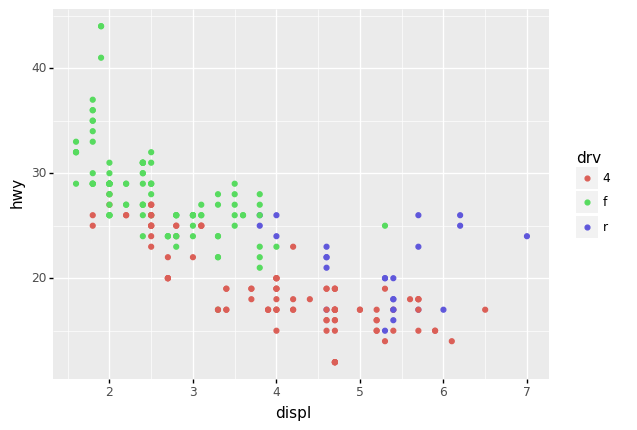

<ggplot: (89999772886)>

In [99]:
(ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy',
                           colour = 'drv')))

Связав тип привода `drv` с цветом, мы можем видеть более сложные зависимости. Например, что среди машин с объемом двигателя до 4 литров почти нет заднеприводных (`drv = 'r'`), или что при равном объеме двигателя полноприводные автомобили (`drv = '4'`) имеют меньший пробег на 1 галлоне топлива.

Вы можете подобрать любые сочетания эстетик для визуализации своих данных, однако стоит помнить о том, что сложность этих эстетик для восприятия разная. Человеку легче всего сравнивать расположение и линейные размеры объектов. А оттенки цвета люди различают плохо. Поэтому стоит помнить правило:

`Самые важные переменные следует связывать с эстетиками положения.`

Эстетики можно условно разделить на два вида: количественные, пригодные для отображения количественных данных и качественные, пригодные для отображения категорий.

<img src="pics/Picture1.png" width=5000 height=600 />

Количественные и качественные эстетики

В plotnine.ggplot вы можете связывать данные с какими угодно эстетиками, однако если, например связать категориальную переменную (фактор) с количественной эстетикой (размер), то вы получите предупреждение. Цвет можно связывать как с количественными, так и с категориальными переменными, при этом будет выбрана подходящая цветовая шкала.

#### Упражнение: связывание данных

В этом упражнении вы будете работать с набором данных о характеристиках и стоимости бриллиантов.

In [100]:
from plotnine.data import diamonds

In [101]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


С описанием набора можно познакомиться в справке: `?diamonds`.

In [102]:
# ?diamonds

Ваша задача - повторить визуализацию, показанную на рисунке.

<img src="pics/Picture3.png" width=5000 height=600 />

In [103]:
#Подсказка:

#(ggplot(data = ___) +
#  geom_point(mapping = aes(x = ____,
#                           y = ____,
#                           ______)))

### Определение (setting) эстетик

Когда эстетика связывается со столбцом данных, значение в этом столбце определяет значение эстетики (level). Однако иногда необходимо вместо **связывания (mapping)** использовать явное **определение (setting)** значений эстетики. В этом случае у всех графических элементов значение эстетики будет одинаковым, - таким как вы зададите.

Чтобы явно определить значение эстетики, необходимо задать это значение вне функции `aes()`. Как правило, при определении эстетик используются константы.

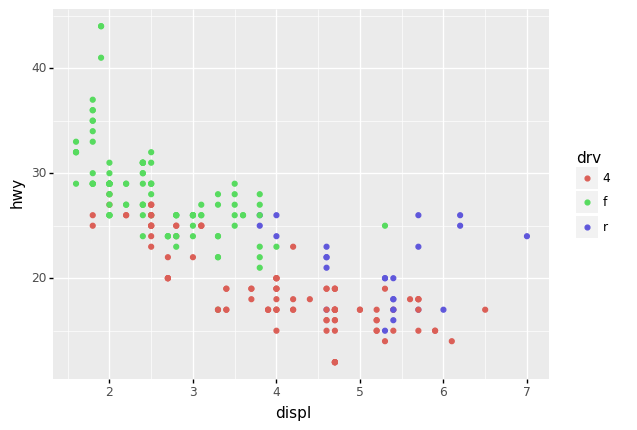

<ggplot: (89999526039)>

In [104]:
# Связывание цвета с переменной
(ggplot(data = mpg) +
  geom_point(mapping = 
               aes(x = 'displ', y = 'hwy',
                   color = 'drv'))) # внутри aes()!

In [105]:
# Определение цвета
(ggplot(data = mpg) +
  geom_point(mapping = 
               aes(x = 'displ', y = 'hwy'),
             color = 'blue')); # вне aes()!

Если случайно попытаться определить значение эстетики внутри функции aes(), то можно получить ошибку:  
`PlotnineError: "Could not evaluate the 'color' mapping: 'blue' (original error: name 'blue' is not defined)"`

In [106]:
# (ggplot(data = mpg) +
#   geom_point(mapping = 
#                aes(x = 'displ', y = 'hwy',
#                    color = 'blue'))) # ошибка: внутри aes()! 

#### Упражнение: определение эстетики

В этом упражнении продолжите работу с набором данных `diamonds`.

Постройте визуализацию зависимости цены бриллианта от его веса и класса огранки (`cut`), запустив следующий блок кода.

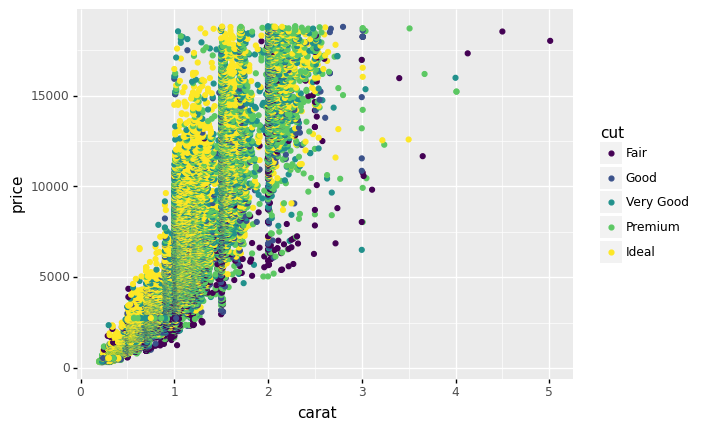

<ggplot: (89998639249)>

In [107]:
# Измените код, чтобы задать прозрачность всех точек 5%
(ggplot(data = diamonds) +
  geom_point(mapping = 
               aes(x = 'carat', y = 'price', 
                   colour = 'cut')))

Точки на графике плохо различимы из-за наложения. Ваша задача - сделать точки полупрозрачными (прозрачность - 5%, или 0.05).

## Геомы и статистики

**Геомы (geom)** - это геометрические объекты, которые используются для визуализации данных на графике. Можно рассматривать их как разные способы визуализации данных. Например, на диаграмме рассеяния для визуализации используются точки (`geom_point()`), на ящичной диаграмме - ящики (`geom_boxplot()`), на гистограмме или столбиковой диаграмме - столбики (`geom_bar()`).

В plotnine поддерживается большое количество типов визуализации, реализованных в виде функций `geom_...()`. Вы можете добавлять геомы к своей визуализации как отдельные слои.

В этом блокноте мы рассмотрим несколько геомов, которые можно использовать для визуализации распределений количественных переменных.

### Гистограммы

Гистограммы применяются для визуализации распределений количественных переменных. В `plotnine` для построения гистограмм используется функция `geom_histogram()`. Гистограмма - одномерный способ визуализации данных, поэтому при связывании эстетик с данными требуется указать только одну эстетику положения - `x`.

C:\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


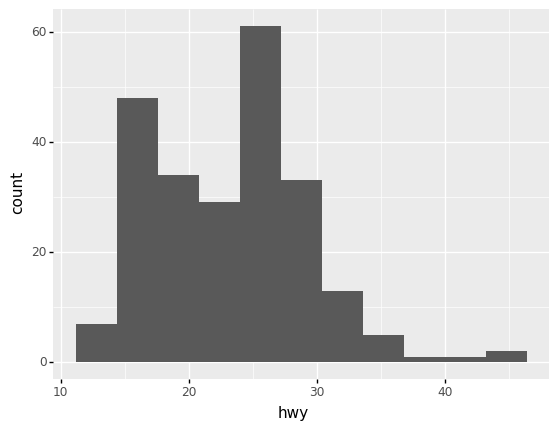

<ggplot: (90000659222)>

In [108]:
(ggplot(data = mpg) +
  geom_histogram(mapping = aes(x = 'hwy')))

Для построения гистограммы используется группировка данных в интервалы. По умолчанию количество интервалов выбирается равным 30, однако часто требуется скорректировать количество интервалов, чтобы сделать визуализацию распределения более наглядной. При уменьшении количества интервалов, что эквивалентно увеличению их ширины, степень сглаживания данных возрастает.

Для настройки интервалов используются два аргумента функции `geom_histogram()`:

* `bins` (количество интервалов, ширина определяется автоматически) и
* `binwidth` (ширина интервала, количество определяется автоматически). 

Кроме того, можно передать вектор с явно заданными границами интервалов через аргумент breaks.

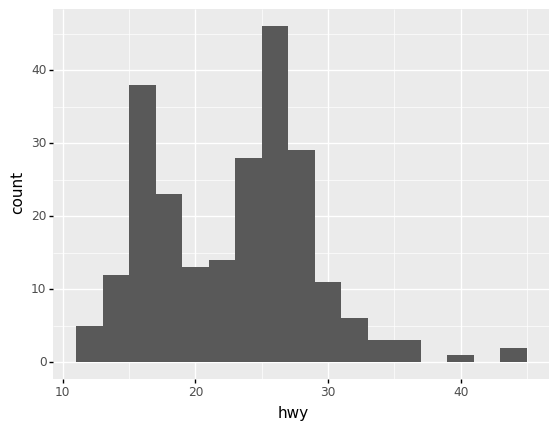

<ggplot: (90000647943)>

In [109]:
(ggplot(data = mpg) +
  geom_histogram(mapping = aes(x = 'hwy'),
                 binwidth = 2))

### Статистические преобразования (stat)

Рассмотрим предыдущий график подробнее. На горизонтальной оси отображены значения переменной `hwy`, которую мы связали с эстетикой положения `x`. Однако на вертикальной оси мы видим переменную `count` (число наблюдений на интервале), которой не было в исходном наборе данных:

In [110]:
mpg.columns.to_list()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

Причина в том, что часто для визуализации исходные данные подвергаются преобразованиям. В нашем примере потребовалось разбить диапазон значений переменной `hwy` на интервалы заданной ширины и подсчитать количество наблюдений на каждом интервале.

<img src="pics/Picture4.png" width=5000 height=600 />

Применение статистической функции

В `plotnine` любой геом связан с некоторым **статистическим преобразованием (stat)**, которое применяется к данным. Например, в справке по `?geom_histogram` можно убедиться, что по умолчанию для этого геома используется статистическое преобразование - группировка в интервалы (**binning**): `stat = 'bin'`.

Статистические преобразования доступны в виде отдельных функций.

Имена статистических функций полезно знать, чтобы смотреть по ним справку. Также их можно добавлять как слои на визуализацию, т.к. каждая статистика связана по умолчанию с определенным геомом.

Имена этих функций формируются по шаблону: `stat_...()`. Например, функция для группировки в интервалы назыавется: `stat_bin()`.

В справке ?stat_bin можно посмотреть, какие показатели (**Computed variables**) вычисляет эта функция:

* `count` - количество наблюдений на интервале (частота),
* `density` - плотность вероятности (площадь под кривой плотности = 1),
* `ncount` - нормированная частота, такая что максимальное значение частоты = 1 (удобно для сравнения распределений),
* `ndensity` - нормированная плотность.

Вычисленные показатели можно связывать с эстетиками. При этом, чтобы отличать их от переменных в исходном наборе данных, необходимо в начале и в конце имени вычисленного показателя добавлять `..`:

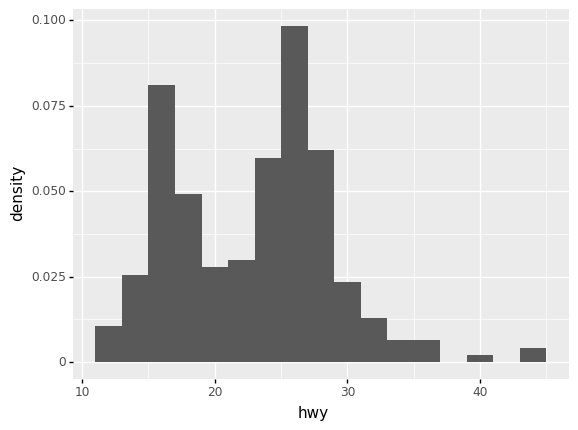

<ggplot: (90000251763)>

In [111]:
(ggplot(data = mpg) +
  geom_histogram(mapping = 
                   aes(x = 'hwy', y = '..density..'),
                 binwidth = 2))

**Замечание**: плотность вероятности выгодно отличается от частоты тем, что значения на оси y не зависят от заданной ширины интервалов:

<img src="pics/Picture5.png" width=100 height=60 />

В то время как при использовании частот, чем шире интервалы - тем выше частота.

Плотность распределения вычисленную эмпирически на основе данных, можно сравнивать с плотностью какого-либо предполагаемого распределения, например нормального.

#### Упражнение: гистограмма с нормированными частотами

Используя набор данных `diamonds`, постройте гистограмму веса бриллиантов (`carat`). На гистограмме должна отражаться нормированная частота. Подберите ширину интервала, которая, на ваш взгляд, хорошо подходит к этим данным (достаточное сглаживание, нет пустых интервалов).

In [112]:
# Раскомментируйте и дополните код:
#(ggplot(data = diamonds) +
#  geom_histogram(aes(x = ___, y = ___),
#                 binwidth = ___))

## Шкалы

**Шкалы (scales)** в `plotnine` определяют, как именно соотносятся значения в данных и визуальные характеристики геометрических элементов. Например, какой цвет должен соответствовать огранке бриллианта `Ideal`, или в каком месте координатной оси должна располагаться точка со значением переменной `carat` = 2. В зависимости от типа визуализируемой переменной, `plotnine` автоматически добавляет для нее дискретную (`discrete`) или непрерывную (`continuous`) шкалу, поэтому при разведочном анализе можно не заботиться о настройке шкал.

Однако настройка шкал позволяет сделать визуализацию более понятной, поэтому она часто нужна, когда вы хотите опубликовать свою визуализацию, или показать ее другим людям.

Вы можете:
- использовать нелинейную (например, логарифмическую) шкалу для визуализации данных,
- выбрать диапазон данных для визуализации, чтобы исключить выбросы, - изменить цветовую палитру графика, - задать шаг сетки и формат делений оси, - упорядочить категории на визуализации и в легенде.

### Нелинейные шкалы

Часто встречаются данные с асимметричным распределением. Из-за наличия выбросов (очень больших значений), основная масса наблюдений оказывается “прижатой” к началу координат и детали формы распределения не видны. Логарифмирование за счет “сжатия” шкалы позволяет лучше видеть форму распределения.

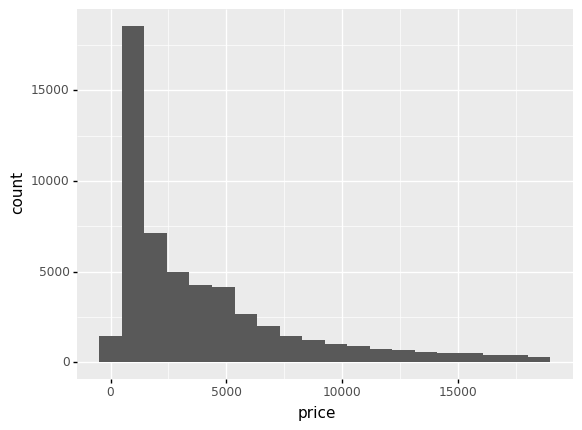

<ggplot: (89999789041)>

In [113]:
# В исходной шкале
(ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = 'price'), bins = 20))

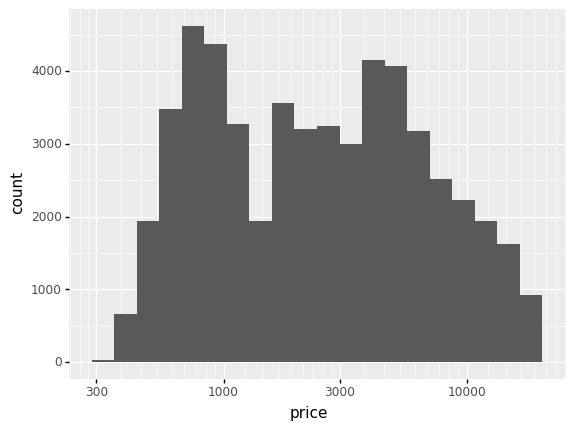

<ggplot: (89999182261)>

In [114]:
# В логарифмической шкале
(ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = 'price'), bins = 20) +
  scale_x_log10())

### Упражнение: нелинейные шкалы

Ранее вы построили визуализацию зависимости цены бриллианта от веса для разных классов огранки. Разброс значений цен и веса бриллиантов очень большой, а зависимость цены от веса - нелинейная. Ваша задача - попробовать “распрямить” эту зависимость за счет использования нелинейной шкалы.

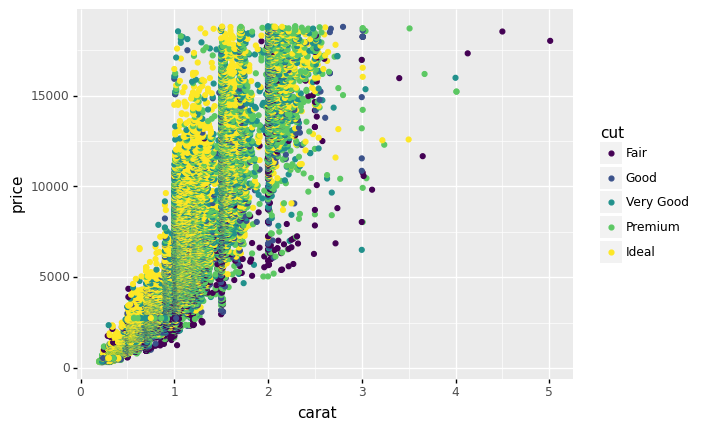

<ggplot: (90000666010)>

In [115]:
# Используйте нелинейные шкалы, чтобы "распрямить" зависимость
(ggplot(data = diamonds) +
  geom_point(mapping = 
               aes(x = 'carat', y = 'price', 
                   colour = 'cut')))

**Подсказки:**

Возможно, вам потребуется изменить шкалу для обеих координатных осей (`scale_x_...()`, `scale_y_...()`).
Попробуйте использовать функции логарифмического преобразования (`scale_..._log10()`) или квадратного корня (`scale_..._sqrt()`)

### Системы координат

Шкалы связывают значения в таблице данных с положением геомов в некоторой системе координат. Однако чтобы увидеть данные, необходимо еще спроецировать эту систему координат на экран.  
Для этого в `plotnine` используются **координатные системы** (`coord_...()`).

В большинстве случаев подходит выбранная по умолчанию система координат. Здесь мы рассмотрим несколько случаев, когда может потребоваться ее поменять.


#### Пример: визуализация географических данных

В наборе данных `airports` содержится список аэропортов США с географическими координатами - широтой и долготой.

In [116]:
from nycflights13 import airports

airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


Попробуем визуализировать эти данные на диаграмме рассеяния:

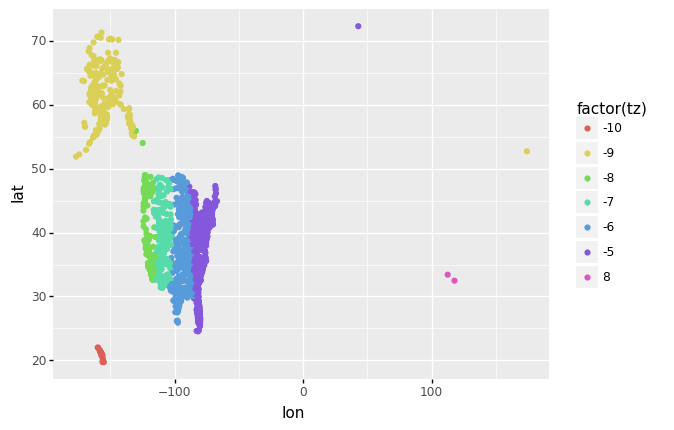

<ggplot: (89999906660)>

In [117]:
(ggplot(data = airports) +
  geom_point(mapping = aes(x = 'lon', y = 'lat', color = 'factor(tz)')))

Форма американского континента выглядит странно, поскольку использование географических координат (на глобусе) в качестве декартовых координат (на плоскости) - грубое приближение. Чтобы получить привычный вид карты, необходимо выбрать координатную систему, которая выполняет картографическую проекцию этих данных. 

К сожалению, на данный момент это невозможно осуществить с помощью функции `coord_quickmap()`, т.к. ее нет в библиотеки `plotnine`, но можно использоваться `coord_fixed()`.

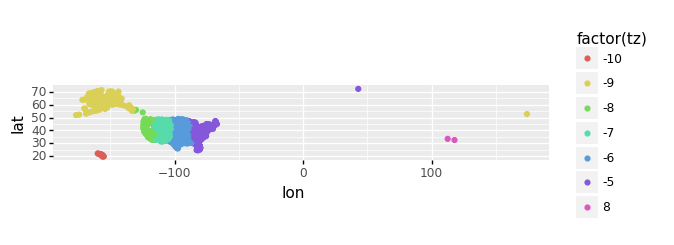

<ggplot: (90000507471)>

In [118]:
(ggplot(data = airports) 
 + geom_point(mapping = aes(x = 'lon', y = 'lat', color = 'factor(tz)')) 
 + coord_fixed())

Теперь очертания континента более узнаваемы.

#### Пример: транспонирование осей 

Встроенные геомы `plotnine` - например, столбиковые диаграммы, предполагают, что категориальные переменные всегда расположены по оси `x`. Это может быть неудобно из-за наложения меток категорий. Вы можете транспонировать оси координат, чтобы метки располагались на вертикальной оси и их можно было прочитать легко.

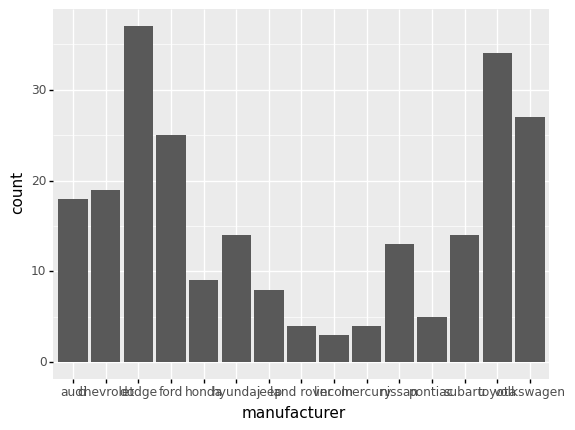

<ggplot: (90000664959)>

In [119]:
# Стандартное расположение - категории по оси X
(ggplot(data = mpg) +
  geom_bar(mapping = aes(x = 'manufacturer')))

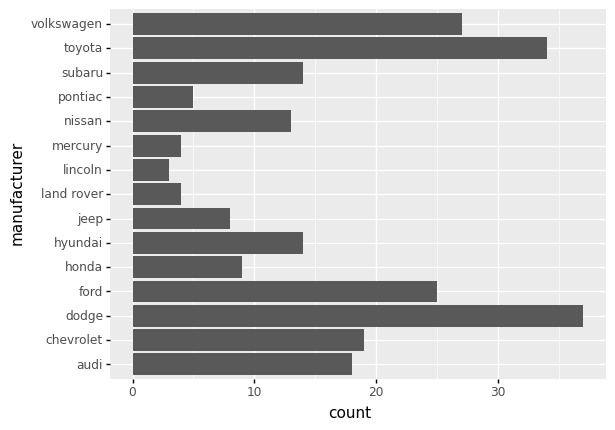

<ggplot: (89999182108)>

In [120]:
# Транспонирование
(ggplot(data = mpg) +
  geom_bar(mapping = aes(x = 'manufacturer')) + 
  coord_flip())

### Другие возможности координатных систем

В приложении 2 рассмотрен пример масштабирования области графика с помощью шкал и координатной системы.  
Более подробно можно познакомиться с координатными системами в руководстве по [plotnine](https://plotnine.readthedocs.io/en/stable/api.html).

## Сравнение групп  
Сравнение групп по некоторому количественному показателю - это часто используемый прием анализа зависимостей. Мы рассмотрим несколько способов сравнения групп.Сравнение групп по некоторому количественному показателю - это часто используемый прием анализа зависимостей. Мы рассмотрим несколько способов сравнения групп.

### Ящичные диаграммы

**Ящичные диаграммы (box plot)** позволяют представить форму распределения количественной переменной в компактной форме и очень удобны для сравнения групп. В качестве примера, сравним топливную эффективность автомобилей с разным типом привода.

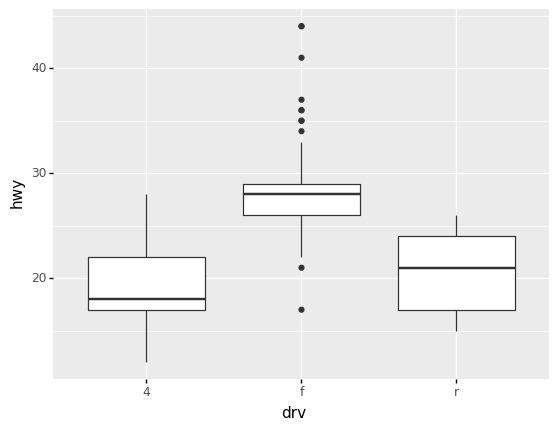

<ggplot: (90000175348)>

In [121]:
(ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = 'drv', y = 'hwy')))

Обратите внимание, что категориальная переменная должна обязательно связываться с эстетикой `x`, а количественная - с `y`. При необходимости, вы можете развернуть ящики с помощью `coord_flip()`.

В `plotnine` для построения ящичных диаграмм обязательно надо указывать обе эстетики - `x` (переменная, которая задает группы) и `y` (количественный показатель для сравнения). Поэтому ящичную диаграмму без разделения на группы построить нельзя. Но можно “обмануть” программу, задав в качестве переменной для группировки константу.

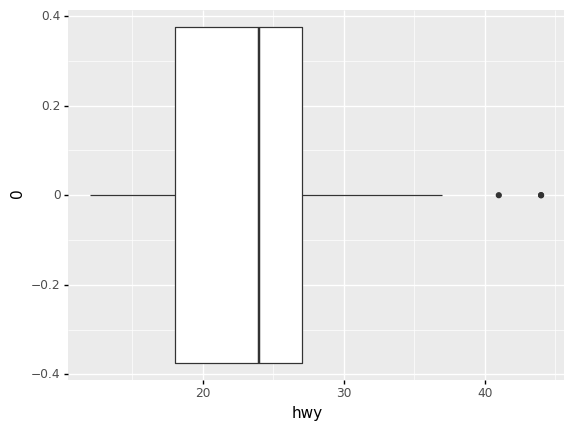

<ggplot: (89999446173)>

In [122]:
(ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = 0, y = 'hwy')) +
  coord_flip())

### Полигоны частот

**Полигон частот** (frequency polygon) - это аналог гистограммы, однако вместо столбиков в нем используются линии. Это позволяет сравнивать на одном графике несколько распределений. Необходимо использовать `geom_freqpoly()` и связывать количественный показатель с эстетикой `x`, а категориальную переменную - `color`.

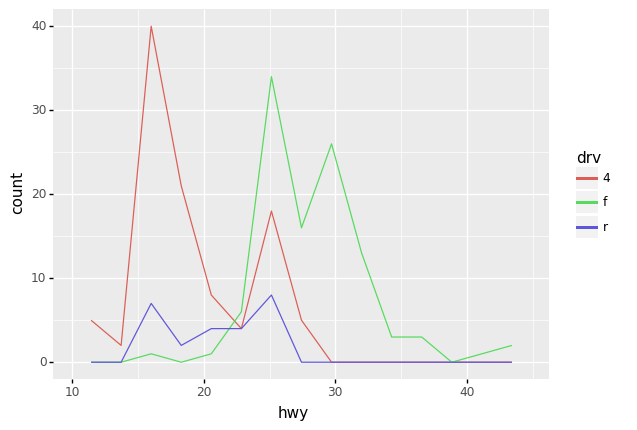

<ggplot: (90004893329)>

In [123]:
(ggplot(data = mpg) +
  geom_freqpoly(mapping = aes(x = 'hwy', color = 'drv'),
                bins = 15))

По умолчанию, график строится по абсолютным частотам. Это неудобно, когда количество наблюдений в подгруппах сильно различается, малочисленные группы “прижимаются” к горизонтальной оси. Для более наглядного сравнения можно использовать либо нормированные частоты, либо посчитать относительные частоты наблюдений.

При нормировке каждый полигон масштабируется таким образом, чтобы максимальная частота была равной 1.

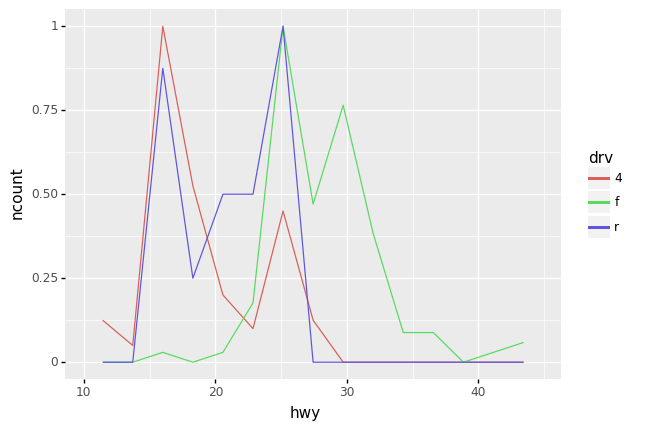

<ggplot: (89999282457)>

In [124]:
(ggplot(data = mpg) +
  geom_freqpoly(mapping = aes(x = 'hwy', y = '..ncount..',
                              color = 'drv'),
                bins = 15))

При использовании относительных частот необходимо посчитать, какую долю составляет частота на интервале относительно общего количества наблюдений (в подгруппе). В `plotnine` относительная частота не вычисляется отдельно, но ее легко получить на основе других показателей, вычисленныйх статистикой `stat_bin()`.

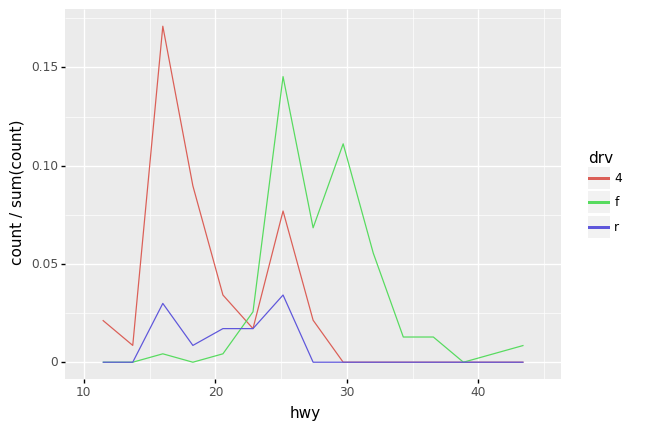

<ggplot: (89999282643)>

In [125]:
(ggplot(data = mpg) +
  geom_freqpoly(mapping = 
                  aes(x = 'hwy', 
                      y = '..count.. / sum(..count..)', # доля от общего числа наблюдений
                      color = 'drv'),
                bins = 15))

## Панели (facets)

Еще одним способом анализа зависимостей в `plotnine` является **расщепление на панели (faceting)**. Вы можете разделить набор данных на подгруппы по значению одной или двух категориальных переменных. После этого для каждой группы будет построен отдельный график.

### Пример: расщепление на панели по одной переменной - `facet_wrap()`

Когда переменная для расщепления одна, удобно использовать функцию `facet_wrap()`. Используем ее для сравнения гистограмм распределений топливной эффективности автомобилей с разным типом привода. Гистограммы удобнее сравнивать, когда они расположены одна под другой, поэтому мы ограничим число столбцов одним с помощью аргумента `ncol =`. Вспомним также о необходимости нормировки частот.

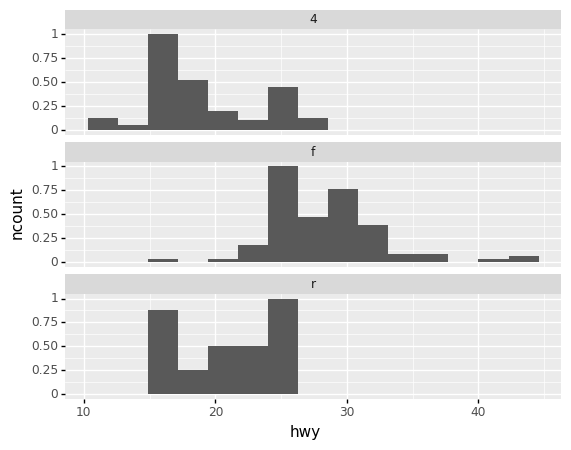

<ggplot: (90000677473)>

In [126]:
(ggplot(data = mpg) +
  geom_histogram(mapping = 
                   aes(x = 'hwy', y = '..ncount..'), 
                 # или: y = ..count.. / sum(..count..)
                bins = 15) +
  facet_wrap('drv', ncol = 1))

Сравнивая гистограммы распределений на панелях, мы видим, что эффективность машин с передним приводом (`f`) выше, а полноприводные машины (`4`) имеют меньший пробег на галлоне топлива. Таким образом, здесь мы видим связь объясняющей переменной (`drv`) и зависимой переменной (`hwy`).

### Пример: расщепление на панели по двум переменным - `facet_grid()`

Расщепление на панели можно сделать и по двум переменным. В этом случае, необходимо использовать функцию `facet_grid()`. В качестве аргумента, этой функции надо передать строку вида: `a ~ b`, где `a` - переменная, по которой будут формироваться строки, а `b` - переменная для формирования столбцов.  

В качестве примера, изучим зависимость цены от веса бриллианта в категориях с различной огранкой и прозрачностью.

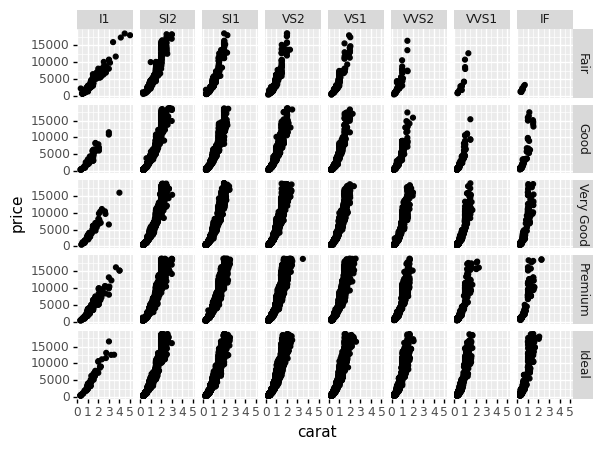

<ggplot: (90000659369)>

In [127]:
(ggplot(data = diamonds) +
  geom_point(mapping = aes(x = 'carat', y = 'price')) +
  facet_grid('cut ~ clarity'))

Другой альтернативный способ подачи аргументов в функцию - это подача не строки, а списка значений, где первая переменная - это зависимая переменная, а вторая - это кортеж из значений, от которых зависит переменная.  
Пример: `a ~ b + c` равносильно `[a, (b, c)]`.

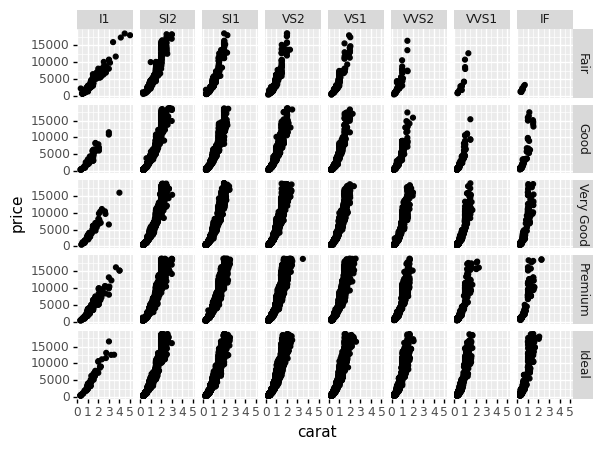

<ggplot: (90000252432)>

In [128]:
(ggplot(data = diamonds) +
  geom_point(mapping = aes(x = 'carat', y = 'price')) +
  facet_grid(['cut', ('clarity')]))

### Упражнение: сравнение групп

Используя набор данных `mpg`, сравните топливную эффективность автомобилей на трассе (`hwy`) в зависимости от класса машины (`class`) и типа привода (`drv`). Какой из рассмотренных в этом разделе способов лучше всего подходит для этой задачи?

In [129]:
# Напишите свой код здесь:

# Приложение 1. Работа со шкалами

## Выбор цветовой шкалы

При связывании переменных с эстетиками цвета `fill` или `color` в зависимости от вида переменной - непрерывная или дискретная - выбирается автоматически цветовая шкала. Для непрерывных переменных используется градиент. Для дискретных переменных выбираются максимально отстоящие друг от друга на цветовом круге оттенки цвета (`hue`). 

В пакете `plotnine` используется цветовое пространство [HCL](http://www.hclwizard.org/why-hcl/).

<img src="pics/Picture6.png" width=500 height=60 />

Цветовой круг

Данный выбор не всегда является оптимальным.

Для визуализации данных был специально разработан набор цветовых шкал `ColorBrewer` (по фамилии разработчика - Cynthia Brewer). Шкалы разрабатывались, в первую очередь, для создания [картограмм](https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5), однако их можно использовать для любых типов визуализаций. Шкалы разработаны с учетом того, что некоторые люди не различают определенные цвета.

В Python эти шкалы реализованы в пакете `mizani`.

<img src="pics/Picture7.png" width=500 height=60 />

In [130]:
# pip install mizani

In [131]:
from mizani.palettes import colorbrewer

Все шкалы ColorBrewer делятся на 3 категории:

- **Последовательные** (sequential) - для количественных переменных, имеющих абсолютный ноль (однонаправленных), или упорядоченных категориальных переменных. На рисунке это шкалы от `YlOrRd` до `Blues`.
- **Качественные** (qualitative) - для неупорядоченных категориальных переменных. На рисунке это шкалы от `Accent` до `Set3`.

- **Двунаправленные** (diverging) - для количественных переменных, имеющих некоторое “центральное значение” и направления больше/меньше от него. На рисунке это шкалы от `Spectral` до `BrBG`.

Шкалы обладают разной степенью цветовой насыщенности. Более “ядовитые” шкалы используются для небольших по размеру геомов - например, точек на диаграммах рассеяния. А для заливки больших площадей, - например, столбиков, - лучше подходят более спокойные оттенки.

Шкалы содержат дискретные цвета, поэтому при визуализации с их помощью непрерывные переменные необходимо дискретизировать (т.е. разбивать на интервалы).

### Пример использования шкалы ColorBrewer для категориальных данных

В `plotnine` нужную цветовую шкалу для категориальных данных можно выбрать, используя функцию: `scale_color_brewer()` (для цвета границы) или `scale_fill_brewer()` (для цвета заливки). Показанное на рисунке имя шкалы надо указать в аргументе `palette =` этой функции.

`ВАЖНО:` при использовании функции `scale_fill_brewer()` важно указывать значение аргумента `type = `. Например, чтобы получить доступ к качественным цветовым шкалам, необходимо указать значение аргумента `type='qual'`. Свободно переключаться по шкалам разных категорий без указания категории (типа) нельзя.

См. также справку: `?scale_color_brewer`.

In [132]:
?scale_color_brewer

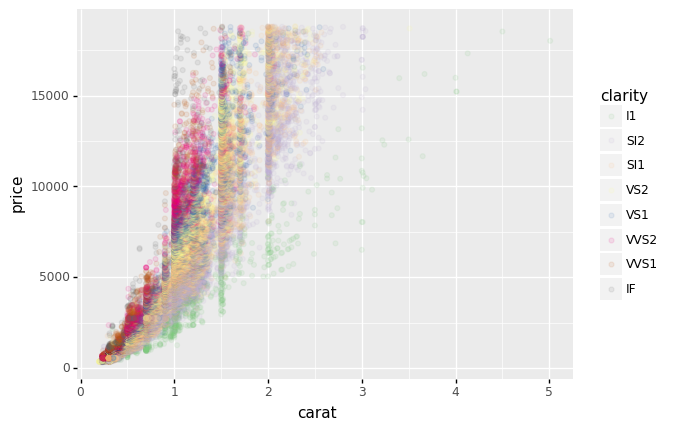

<ggplot: (90004457479)>

In [133]:
(ggplot(data = diamonds) +
  geom_point(mapping = aes(x = 'carat', y = 'price', 
                           color = 'clarity'),
             alpha = 0.1) +
  scale_color_brewer(type = 'qual', palette = 'Accent'))

### Пример использования цветовых шкал для непрерывных данных

Шкалы ColorBrewer создавались для визуализации дискретных значений - упорядоченных и неупорядоченных категорий. Однако их можно использовать и с непрерывными переменными. В `plotnine` есть две функции - `scale_color_distiller()` и `scale_fill_distiller()` - соответственно, для цвета границы и заливки. Эти функции позволяют применять шкалы ColorBrewer к непрерывным данным. Они интерполируют дискретные цвета, включенные в шкалу. Палитра задается через аргумент `palette =`.

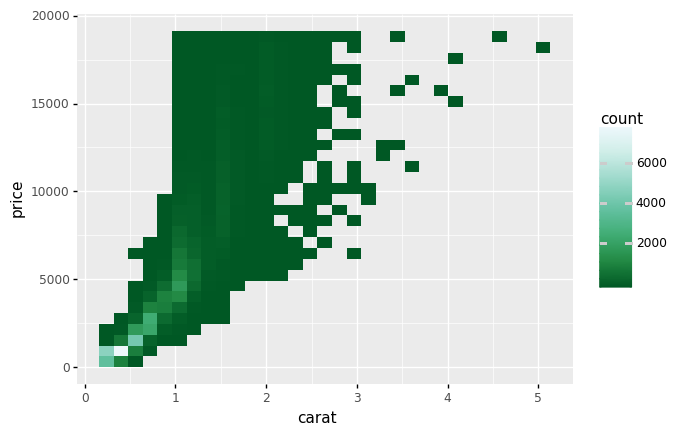

<ggplot: (90004431165)>

In [134]:
(ggplot(data = diamonds) +
  geom_bin2d(mapping = aes(x = 'carat', y = 'price')) + 
  scale_fill_distiller(palette = "BuGn"))

Специально для непрерывных данных была разработана еще одна цветовая шкала - `viridis`. Эта шкала обеспечивает правильную передачу значений даже при черно-белой печати и при использовании людьми, не различающими некоторые цвета.  
Для этого необходимо в функции `scal_fill_cmap()` задать параметр `cmap_name='viridis'`. Список доступных названий цветовых шкал можно увидеть ниже.

In [135]:
# import matplotlib
# all_cmaps = [key for key in matplotlib.cm.cmap_d.keys()]
# print(*all_cmaps, sep = '  ')

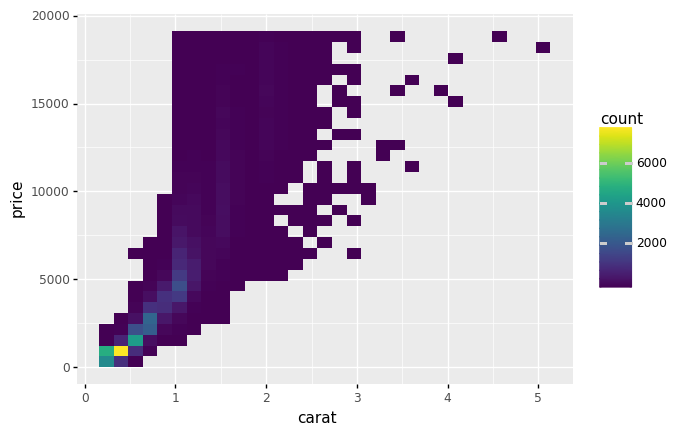

<ggplot: (90004802717)>

In [136]:
(ggplot(data = diamonds) +
  geom_bin2d(mapping = aes(x = 'carat', y = 'price')) +
  scale_fill_cmap())

## Настройка делений и меток шкалы

Для настройки шага делений и меток делений шкалы в `plotnine` используются аргументы `breaks` и `labels` соответственно.

### Пример: определение шага деления шкалы на координатной оси

Требуется задать шаг делений вертикальной оси 5 единиц:

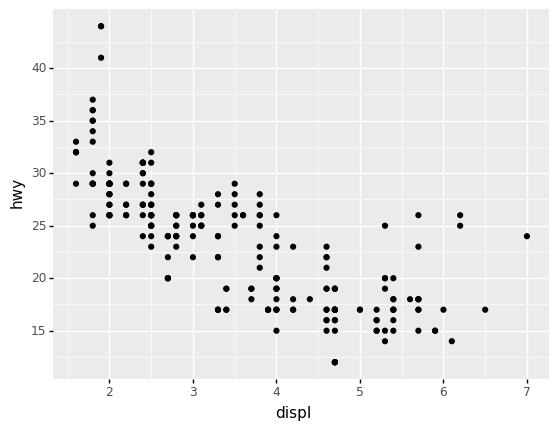

<ggplot: (90004339050)>

In [137]:
(ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy')) +
  scale_y_continuous(breaks = range(15, 41, 5)))

### Пример: порядок и метки категорий цветовой шкалы

Требуется задать порядок категорий цветовой шкалы и определить понятные метки для категорий.

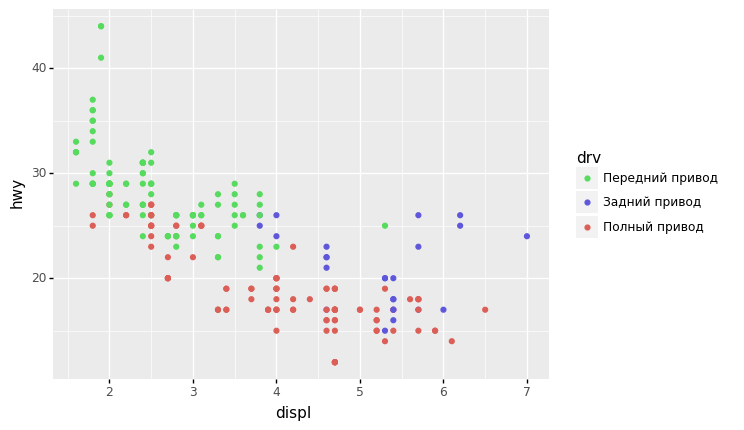

<ggplot: (90004867271)>

In [138]:
(ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy',
                           colour = 'drv')) +
  scale_color_discrete(breaks = ['f', 'r', '4'],    # порядок
                       labels = ['Передний привод', # метки
                                  'Задний привод',
                                  'Полный привод']))

# Приложение 2. Определение пределов для координатных осей

В `plotnine` есть два способа, с помощью которых можно задать пределы для координатных осей:
- с использованием шкалы,
- с использованием координатной системы.

При использовании шкалы происходит фильтрация исходных данных в заданных пределах и те точки, которые выходят за них, просто не попадают в визуализацию. При использовании координатной системы данные визуализируются полностью, однако те точки, которые выходят за пределы, остаются невидимыми.

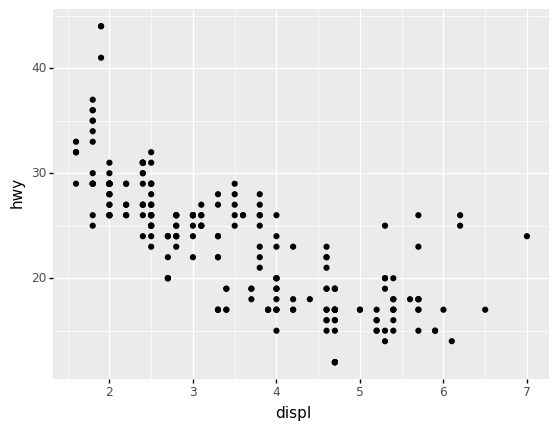

<ggplot: (90004461544)>

In [139]:
# Исходный график
p = (ggplot(data = mpg, 
            mapping = aes(x = 'displ', y = 'hwy')) +
  geom_point())
p

C:\Anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 114 rows containing missing values.


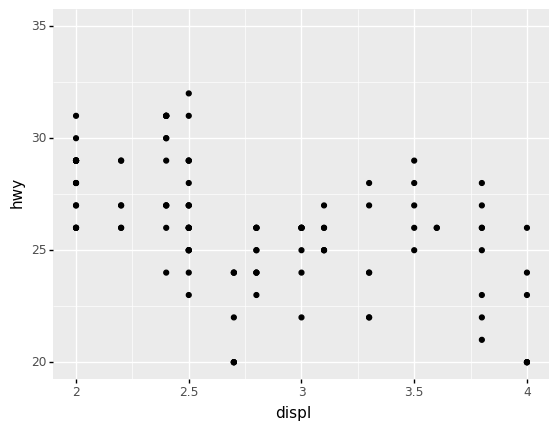

<ggplot: (90004333002)>

In [140]:
# Ограничение области визуализации с помощью шкалы
p + xlim(2, 4) + ylim(20, 35) 

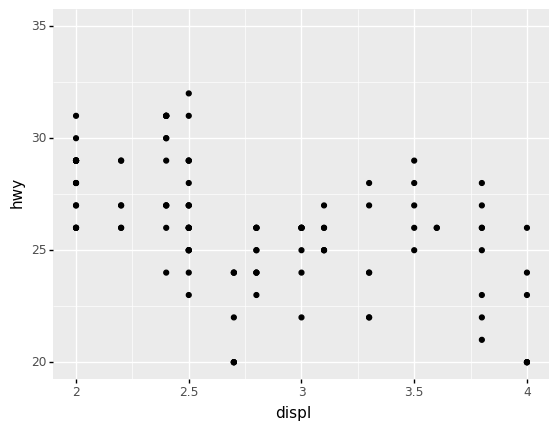

<ggplot: (90000238737)>

In [141]:
# или + scale_x_continuous(limits = c(2, 4))

# Ограничение области визуализации с помощью координатной системы
p + coord_cartesian(xlim = [2, 4], ylim = [20, 35])

Хотя визуально графики не отличаются, на них отражен разный объем данных. Поэтому, если мы будем добавлять на визуализацию еще какие-нибудь слои, то результат может отличаться.

C:\Anaconda3\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 114 rows containing missing values.


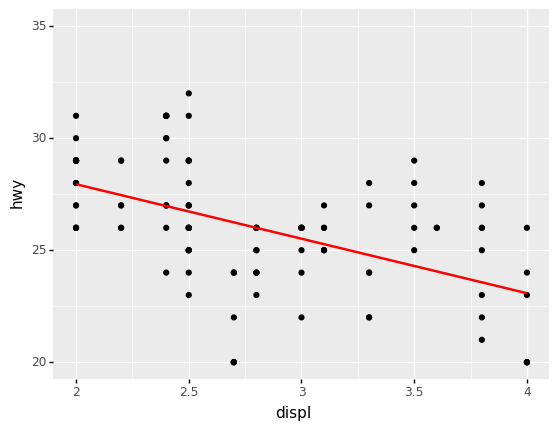

<ggplot: (90004338951)>

In [142]:
# Ограничение области визуализации с помощью шкалы
(p + xlim(2, 4) + ylim(20, 35) + 
  geom_smooth(method = 'lm', se = False, color = 'red'))

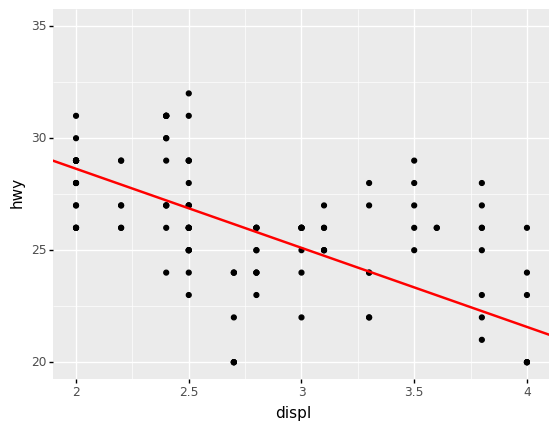

<ggplot: (90000238641)>

In [143]:
# Ограничение области визуализации с помощью координатной системы
(p + coord_cartesian(xlim = [2, 4], ylim = [20, 35]) +
  geom_smooth(method = 'lm', se = False, color = 'red'))

Положение линий тренда на графиках отличается. На первом графике тренд построен только по тем данным, которые попали в окно диаграммы (остальные данные отфильтрованы). На втором - по всем данным, даже тем, которые на графике не видны.

Что же выбрать? Оба метода полезны в определенной ситуации. Например, если в ваших данных есть выбросы и вы не хотите, чтобы линии тренда или опорные линии (среднее, медиана) для этих данных смещались из-за них, то можно отфильтровать эти выбросы, задав пределы при помощи шкалы.

Если вы хотите получше рассмотреть какую-нибудь область графика, но при этом не хотите искажать статистики из-за фильтрации, то лучше использовать ограничение области просмотра с помощью координатной системы.

# Приложение 3. Как сделать понятные подписи для графиков

В `plotnine` оформление графиков можно гибко настраивать. 

Здесь же мы покажем, как задать понятные подписи для графика. Это необходимо делать во всех графиках, которые вы намереваетесь кому-то показывать.

Для определения подписей на графике можно использовать функции, изменяющие отдельные элементы - например, `xlab()` - для изменения подписи для оси x. Но удобнее использовать функцию `labs()`, которая позволяет задать все подписи сразу.

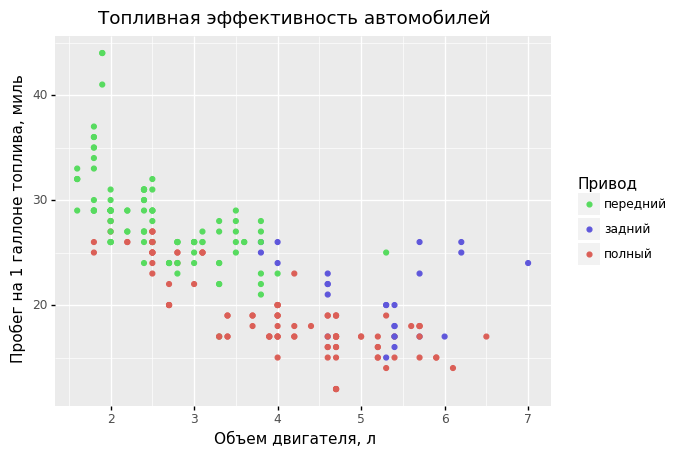

<ggplot: (90001890506)>

In [144]:
(ggplot(data = mpg) +
  geom_point(mapping = aes(x = 'displ', y = 'hwy',
                           colour = 'drv')) +
  scale_color_discrete(breaks = ['f', 'r', '4'],
                       labels = ['передний',
                                  'задний',
                                  'полный']) +
  labs(title = 'Топливная эффективность автомобилей',
       x = 'Объем двигателя, л',
       y = 'Пробег на 1 галлоне топлива, миль',
       color = 'Привод'))